# Análisis de Portafolios

In [8]:
# Importar las librerías
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [9]:
import yfinance as yf

# Vamos a comparar estadísticamente una lista de tickers

In [15]:
# Vamos a descargar 3 tickers, necesitamos una fecha inicial y una fecha de término
fecha_inicial = "2021-12-31"
fecha_final = "2023-10-05"

In [16]:
femsa = yf.download("FEMSAUBD.MX", fecha_inicial, fecha_final)
herdez = yf.download("HERDEZ.MX", fecha_inicial, fecha_final)
cuervo = yf.download("CUERVO.MX", fecha_inicial, fecha_final)
arca = yf.download("AC.MX", fecha_inicial, fecha_final)
alsea = yf.download("ALSEA.MX", fecha_inicial, fecha_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [17]:
# Vamos a hacer una tabla con los 5 tickers y el precio de cierre
tickers = ("FEMSAUBD.MX", "AC.MX", "CUERVO.MX", "HERDEZ.MX", "ALSEA.MX")
datos = yf.download(tickers, fecha_inicial, fecha_final)["Close"]
datos

[*********************100%%**********************]  5 of 5 completed


,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,130.520004,37.950001,51.360001,159.320007,40.480000
2022-01-03,128.520004,39.939999,51.270000,159.110001,39.990002
2022-01-04,130.869995,41.029999,51.139999,161.389999,39.869999
2022-01-05,129.750000,41.900002,50.810001,162.210007,39.700001
2022-01-06,128.740005,41.779999,50.560001,161.800003,39.990002
...,...,...,...,...,...
2023-09-28,158.050003,63.419998,42.560001,189.089996,41.830002
2023-09-29,158.770004,63.599998,41.619999,189.979996,40.619999
2023-10-02,160.149994,62.990002,41.590000,195.759995,40.610001


In [18]:
datos.describe()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,445.000000,445.000000,445.000000,445.000000,445.000000
mean,150.660922,45.469933,44.517865,159.139775,38.071775
std,17.694222,7.981005,3.470671,20.808200,6.963327
min,118.010002,34.930000,35.450001,121.089996,24.820000
25%,133.050003,38.810001,42.240002,144.570007,31.559999
50%,155.410004,43.270000,44.480000,159.320007,39.500000
75%,164.139999,49.939999,46.520000,173.570007,44.730000
max,181.089996,66.000000,53.400002,199.669998,49.230000


In [21]:
varianza = datos.std()**2
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [22]:
rendimientos = datos.pct_change()
var = rendimientos.var()*100
var

AC.MX          0.021079
ALSEA.MX       0.035221
CUERVO.MX      0.024660
FEMSAUBD.MX    0.020692
HERDEZ.MX      0.048892
dtype: float64

In [23]:
rendimientos.describe()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.000537,0.001361,-0.000376,0.000562,0.000182
std,0.014519,0.018767,0.015703,0.014385,0.022112
min,-0.048598,-0.071988,-0.056592,-0.070087,-0.063233
25%,-0.008347,-0.010033,-0.010216,-0.008396,-0.012550
50%,0.000502,0.001660,-0.000275,0.000434,-0.000502
75%,0.008380,0.011904,0.008956,0.008580,0.013467
max,0.070801,0.088256,0.055485,0.088805,0.084856


In [24]:
datos.cov()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
AC.MX,313.085508,63.637468,-28.334256,210.337978,106.627247
ALSEA.MX,63.637468,63.696433,1.902371,144.833015,25.854515
CUERVO.MX,-28.334256,1.902371,12.045557,11.746211,-5.794332
FEMSAUBD.MX,210.337978,144.833015,11.746211,432.981202,99.168792
HERDEZ.MX,106.627247,25.854515,-5.794332,99.168792,48.487926


In [28]:
herdez["Rendimientos"] = (herdez["Close"]/herdez["Close"].shift(1))-1
herdez = herdez[["Close", "Rendimientos"]].dropna()
herdez

,Close,Rendimientos
Date,,
2022-01-03,39.990002,-0.012105
2022-01-04,39.869999,-0.003001
2022-01-05,39.700001,-0.004264
2022-01-06,39.990002,0.007305
2022-01-07,39.320000,-0.016754
...,...,...
2023-09-28,41.830002,0.005529
2023-09-29,40.619999,-0.028927
2023-10-02,40.610001,-0.000246


<Axes: >

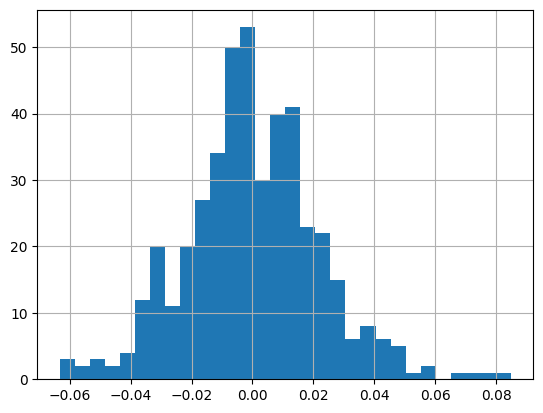

In [27]:
herdez["Rendimientos"].hist(bins = 30)